# Usage: quickest tour
Thank you for using CovsirPhy!!  
This is the quickest tour to get an overview of CovsirPhy.

- Download datasets
- Parameter estimation with phase-dependent SIR-derived models
- Simulate the number of cases

## Preparation
Prepare the packages.

In [1]:
from pprint import pprint

In [2]:
import covsirphy as cs
cs.__version__

'2.17.0'

## Dataset preparation
Download the datasets to "../input" directory and load them.
If "../input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Please refer to [Usage: datasets](https://lisphilar.github.io/covid19-sir/usage_dataset.html) for the details.

In [3]:
# Standard users and developers
data_loader = cs.DataLoader("../input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu()
# Population in each country
population_data = data_loader.population()

We can select the following countries.

In [4]:
pprint(set(jhu_data.countries()) & set(population_data.countries()), compact=True)

{'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica',
 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam',
 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See',
 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ira

## Start scenario analysis
As an example, we will analysis the number of cases in Italy using `Scenario` class. To initialize this class, we need to specify the country name.

In [5]:
snl = cs.Scenario(country="Italy", province=None)
snl.register(jhu_data, population_data)

## Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot. Some kind of complement will be done for analysis, if necessary.

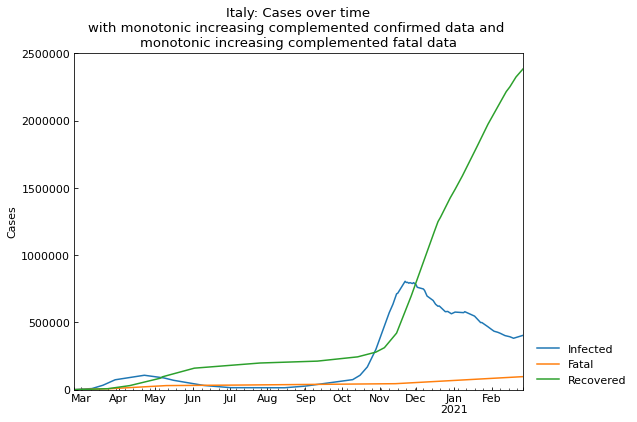

,Date,Infected,Fatal,Recovered
365,2021-02-23,387948,96348,2347866
366,2021-02-24,389433,96666,2362465
367,2021-02-25,396143,96974,2375318
368,2021-02-26,404664,97227,2387032
369,2021-02-27,404664,97227,2387032


In [6]:
df = snl.records()
df.tail()

## S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. This is a significant step of analysis because we assume that ODE parameter values will be changed phase by phase (not daily basis, not constant through the outbreak).  
Details will be explained in [Usage: phases](https://lisphilar.github.io/covid19-sir/usage_phases.html).

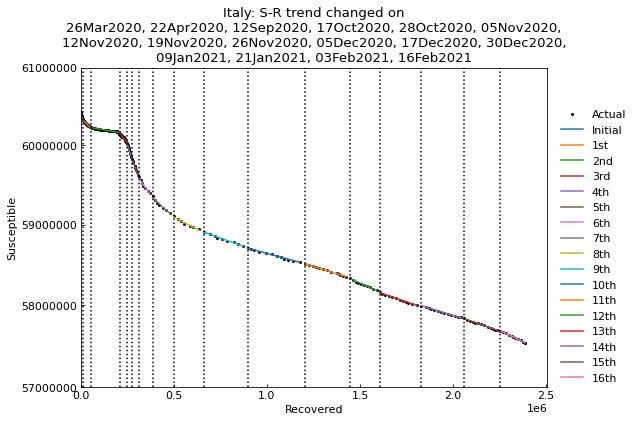

In [7]:
_ = snl.trend()

Summarize the phases.

- Type: "Past" or "Future"
- Start: start date of the phases
- End: end date of the phases
- Population: total population in the phases

In [8]:
snl.summary()

,Type,Start,End,Population
0th,Past,24Feb2020,25Mar2020,60421760
1st,Past,26Mar2020,21Apr2020,60421760
2nd,Past,22Apr2020,11Sep2020,60421760
3rd,Past,12Sep2020,16Oct2020,60421760
4th,Past,17Oct2020,27Oct2020,60421760
5th,Past,28Oct2020,04Nov2020,60421760
6th,Past,05Nov2020,11Nov2020,60421760
7th,Past,12Nov2020,18Nov2020,60421760
8th,Past,19Nov2020,25Nov2020,60421760
9th,Past,26Nov2020,04Dec2020,60421760


## Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage: SIR-derived models](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [9]:
# Default value of timeout is 180 sec
snl.estimate(cs.SIRF, timeout=30)


<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...


	16th phase (16Feb2021 - 27Feb2021): finished  402 trials in 0 min 30 sec


	 1st phase (26Mar2020 - 21Apr2020): finished  336 trials in 0 min 30 sec

	 2nd phase (22Apr2020 - 11Sep2020): finished  290 trials in 0 min 30 sec

	 5th phase (28Oct2020 - 04Nov2020): finished  343 trials in 0 min 30 sec

	 3rd phase (12Sep2020 - 16Oct2020): finished  334 trials in 0 min 30 sec

	 0th phase (24Feb2020 - 25Mar2020): finished  252 trials in 0 min 30 sec

	 6th phase (05Nov2020 - 11Nov2020): finished  260 trials in 0 min 30 sec

	 7th phase (12Nov2020 - 18Nov2020): finished  261 trials in 0 min 30 sec

	 4th phase (17Oct2020 - 27Oct2020): finished  262 trials in 0 min 30 sec

	 9th phase (26Nov2020 - 04Dec2020): finished  231 trials in 0 min 20 sec

	 8th phase (19Nov2020 - 25Nov2020): finished  318 trials in 0 min 30 sec

	10th phase (05Dec2020 - 16Dec2020): finished  288 trials in 0 min 30 sec

	11th phase (17Dec2020 - 29Dec2020): finished  264 trials in 0 min 30 sec

	12th phase (30Dec2020 - 08Jan2021): finished  338 trials in 0 min 30 sec

	13th phase (09Jan2021 - 20Jan2021): finished  276 trials in 0 min 30 sec

	14th phase (21Jan2021 - 02Feb2021): finished  333 trials in 0 min 30 sec

	15th phase (03Feb2021 - 15Feb2021): finished  267 trials in 0 min 30 sec

Completed optimization. Total: 1 min 34 sec


## History of reproduction number
Let's see the history of parameter values. Reproduction number is here.

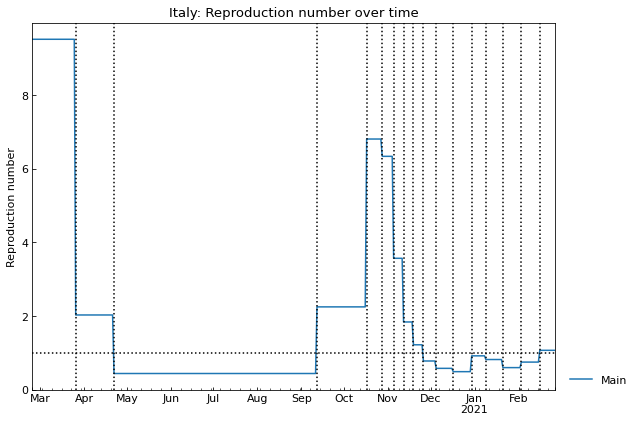

In [10]:
_ = snl.history(target="Rt")

## History of parameters
History of each parameter. Values will be divided by the values in 0th phase.

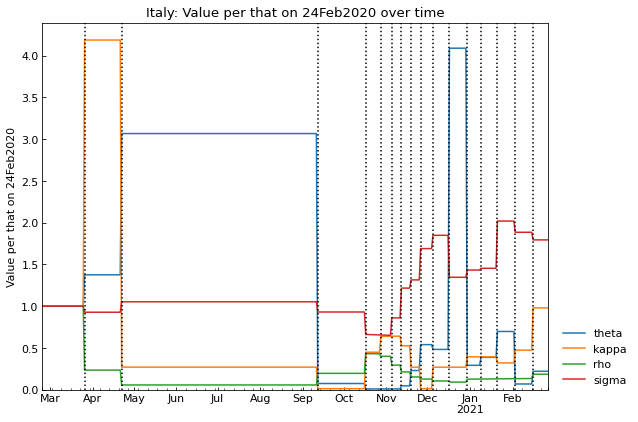

In [11]:
_ = snl.history_rate()

## Simulate the number of cases
How many cases will be in 30 days if the parameter values will not be changed from today?

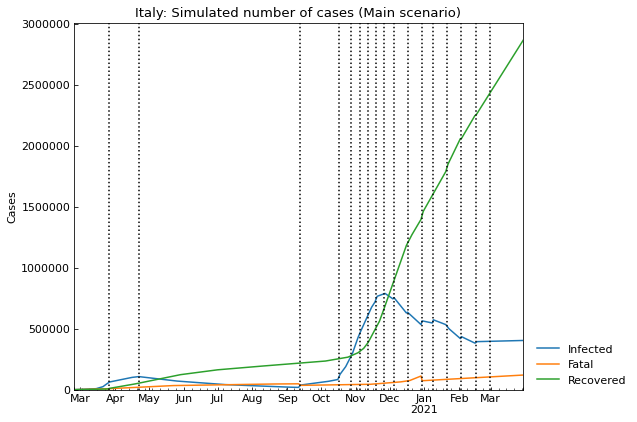

In [12]:
# Add a phase with 30 days from the date of the last record
snl.add(days=30)
_ = snl.simulate()

Next, please see [Usage: scenario analysis](https://lisphilar.github.io/covid19-sir/usage_quick.html) to find details of datasets and how to perform scenario analysis.  
Thank you!